In [18]:
!pip install scikit-image


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


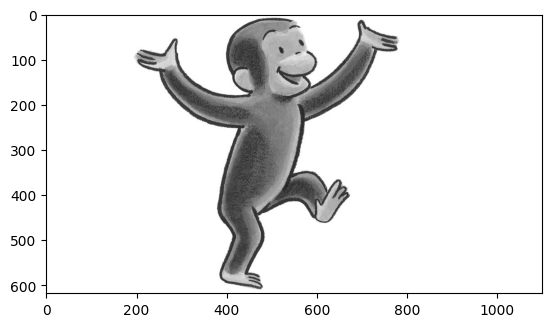

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color
from skimage import io

data = mpimg.imread('george.jpg')
data = color.rgb2gray(io.imread('george.jpg'))
plt.imshow(data, cmap='gray')
plt.show()

In [20]:
U, s, Vt = np.linalg.svd(data)
print(U.shape, s.shape, Vt.shape)
print(s[:60])

(618, 618) (618,) (1100, 1100)
[757.09381517  61.45223213  49.14770176  45.48225744  36.46501747
  27.07753888  23.25420972  22.42468713  18.61228375  17.38698379
  15.89114685  14.10877721  13.86074269  13.15134055  12.82917234
  12.5375488   11.91794124  11.49297214  11.09608183  10.85633726
  10.4818775    9.98457167   9.86413029   9.15513056   9.00094858
   8.77850068   8.5712234    8.33917797   8.073087     7.95283834
   7.68656657   7.51862574   7.3695919    7.17732907   7.00076379
   6.88688279   6.71919727   6.44518014   6.23334463   6.09349674
   5.88187497   5.7363882    5.54955146   5.45140114   5.42789752
   5.16724545   4.90900623   4.80195278   4.73261001   4.68327733
   4.53002809   4.41432819   4.34611068   4.27279181   4.24228568
   4.131665     4.08003354   3.93147927   3.88906782   3.71988773]


Text(0.5, 1.0, 'Singular values')

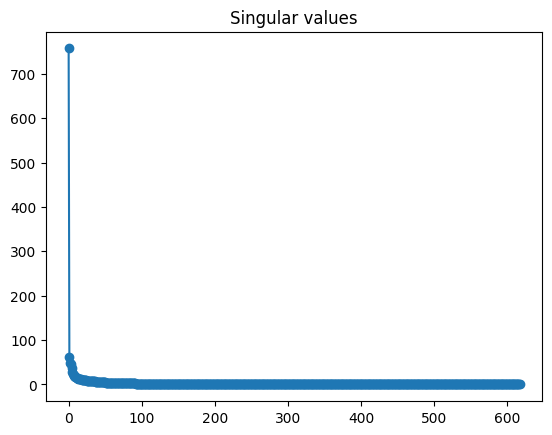

In [21]:
plt.plot(s, 'o-')
plt.title('Singular values')

In [22]:
RANK = 10

In [24]:
k = 10
S = np.diag(s[:k])
Ak = U[:, :k] @ S @ Vt[:k, :]
print(U[:, :k].shape, S.shape, Vt[:k, :].shape)
print(Ak.shape)

(618, 10) (10, 10) (10, 1100)
(618, 1100)


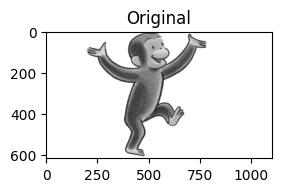

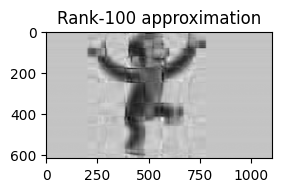

In [25]:
plt.subplot(1,2,1)
plt.imshow(data, cmap='gray')
plt.title('Original')
plt.show()

plt.subplot(1,2,2)
plt.imshow(Ak,cmap='gray')
plt.title('Rank-100 approximation')
plt.show()

Text(0.5, 1.0, 'Low-Rank Approximation')

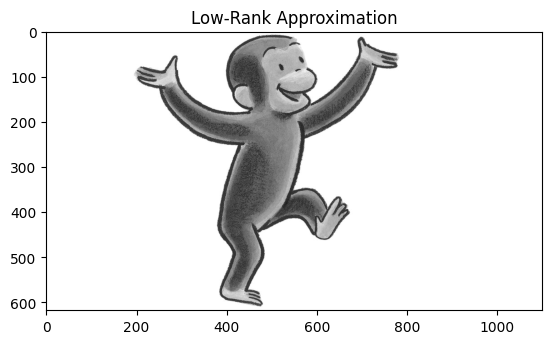

In [ ]:
# Set up the figure and axes for the animation
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='gray')
ax.set_title('Low-Rank Approximation')

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

ranks = range(0, 101, 10) # low rank 5 to 60, 60 is good enough.

def update(rank):
    S = np.zeros((U.shape[0], Vt.shape[1]))
    for i in range(rank):
        S[i, i] = s[i]
    restored_image = U @ S @ Vt
    im.set_data(restored_image)
    ax.set_title(f'Rank-{rank} approximation')
    return im,

# Create and save the animation
ani = FuncAnimation(fig, update, frames=ranks, blit=True)
writer = PillowWriter(fps=2)  # Set frames per second
ani.save('low_rank_approximation.gif', writer=writer)
plt.show()
